# ANALYSIS OF AMERICAN-STYLE CALL AND PUT OPTIONS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [1]:
import sys
sys.path.append("..")
sys.path.append("..\\..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils.FinDate import FinDate
from financepy.products.equities.FinOption import FinOptionTypes
from financepy.products.equities.FinVanillaOption import FinVanillaOption
from financepy.products.equities.FinAmericanOption import FinAmericanOption
from financepy.products.equities.FinEquityModelTypes import FinEquityModelBlackScholes
from financepy.market.curves.FinFlatCurve import FinFlatCurve

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [4]:
expiryDate = FinDate(1, 7, 2015)
strikePrice = 100.0

We now create the European and an American option with the SAME payoff. This is just an initial test that they are the same.

In [5]:
europeanOption = FinVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

In [6]:
americanOption = FinAmericanOption(expiryDate, strikePrice, FinOptionTypes.AMERICAN_PUT) 

## Valuation

To do a valuation we need to specify the date and set the market inputs

In [7]:
valueDate = FinDate(1, 1, 2015)
stockPrice = 100
dividendYield = 0.01
interestRate = 0.05
discountCurve = FinFlatCurve(valueDate, interestRate, 1)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [8]:
volatility = 0.30
model = FinEquityModelBlackScholes(volatility)

The valuation is as follows

In [16]:
europeanValue = europeanOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print("European Option Value: %12.8f" %europeanValue)
americanValue = americanOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 500)
print("American Option Value: %12.8f" %americanValue['value'])

European Option Value:   7.37525897
American Option Value:   7.55365011


The American option is slightly more expensive.

Note that the American Call Option returns a dictionary of values

In [17]:
americanValue

{'value': 7.553650113049471,
 'delta': -0.4344232970341507,
 'gamma': 0.019558069086755267,
 'theta': -6.747272611273832}

We can also compute these directly

In [18]:
americanOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.43294553371708844

In [19]:
americanOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

0.017700538919029896

In [20]:
americanOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

-8.645971469928323

In [21]:
americanOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

27.413653926622317

In [22]:
americanOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

-18.27207117093721

Now let's see the value (if any) of the American exercise

### Spot Price Dependency

We can examine how the option value depends on the spot price

In [16]:
stockPrices = np.linspace(60,140,100)
euroValues = []
amerValues = []

for stockPrice in stockPrices:
    europeanValue = europeanOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    americanValue = americanOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    euroValues.append(europeanValue)
    amerValues.append(americanValue['value'])

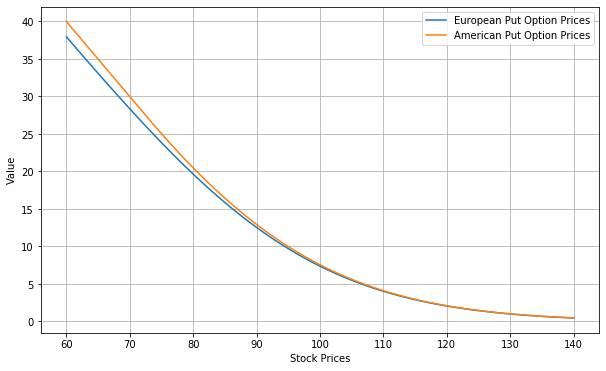

In [17]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices,euroValues, label="European Put Option Prices")
plt.plot(stockPrices,amerValues, label="American Put Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

## Convergence Testing

I will compare pricing a European call option using Black-Scholes to pricing the same option on the Binomial Tree since one is exact.

In [44]:
expiryDate = FinDate(1, 7, 2015)
payoffType = FinOptionTypes.EUROPEAN_CALL
strikePrice = 100.0

In [45]:
europeanCallOptionAnalytical = FinVanillaOption(expiryDate, strikePrice, payoffType)
europeanCallOptionTree = FinAmericanOption(expiryDate, strikePrice, payoffType)

Market Inputs

In [46]:
valueDate = FinDate(1, 1, 2015)
stockPrice = 100.0
dividendYield = 0.0
interestRate = 0.05
discountCurve = FinFlatCurve(valueDate, interestRate, 1)
volatility = 0.30
model = FinEquityModelBlackScholes(volatility)

Want to see how the price difference depends on the number of steps on the tree.

In [47]:
numStepsList = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

In [48]:
treeValues = []
analyticalValues = []
diffs = []
for numSteps in numStepsList:
        value1 = europeanCallOptionAnalytical.value(valueDate, stockPrice, discountCurve, dividendYield, model)
        value2 = europeanCallOptionTree.value(valueDate, stockPrice, discountCurve, dividendYield, model, numSteps)
        analyticalValues.append(value1)
        treeValues.append(value2['value'])
        diffs.append(value1 - value2['value'])

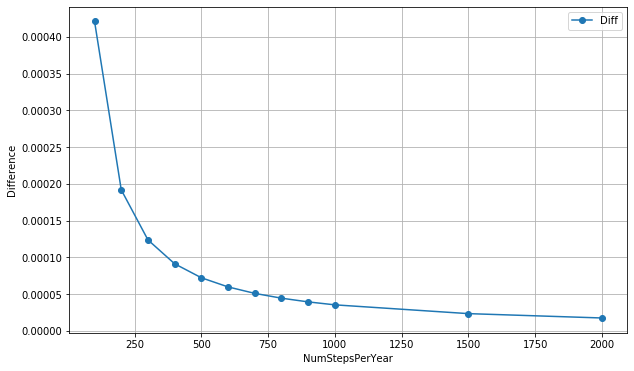

In [49]:
plt.figure(figsize=(10,6))
#plt.plot(numStepsList, treeValues, label='Binomial Tree')
#plt.plot(numStepsList, analyticalValues, label='Analytical')
plt.plot(numStepsList, diffs, label='Diff', marker='o')
plt.xlabel("NumStepsPerYear")
plt.ylabel("Difference")
plt.legend()
plt.grid()

The convergence is very good. With 100 time steps the error is in the 4th decimal place. 

Copyright (c) 2019, Dominic O'Kane 